# Mínimos cuadrados lineales

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados lineales es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de mínimos cuadrados se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/zkbhzv9a2jiw11b/espacio_generado_columnas_de_A.png?dl=0" heigth="400" width="400">

## Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

**Obs:** 

* Si $n=m$ entonces se tiene un problema de interpolación.
* x se nombra variable **regresora**.

## ¿Cómo ajustar el modelo anterior?

En lo siguiente se **asume** $n+1 \leq m+1$ (tenemos más puntos $(x_i,y_i)$'s que parámetros a estimar).

Para realizar el ajuste de mínimos cuadrados se utilizan las ecuaciones normales: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^m
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el sistema de ecuaciones por resolver:

$$R\beta = Q^Ty$$

# Ejemplo

In [107]:
install.packages(c("latex2exp","glmnet"),lib="/usr/local/lib/R/site-library/",
                repos="https://cran.itam.mx/")

In [1]:
inc_index<-function(vec,index,h){
    '
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (double): vector
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (double): vector with vec[index] increased by h.
    '
    vec[index]<-vec[index]+h
    vec
}

In [2]:
gradient_approximation<-function(f,x,h=1e-8){
    '
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.

    '
    n<-length(x)
    gf<-vector("double",n)
    for(i in 1:n){
        gf[i]=(f(inc_index(x,i,h))-f(x))
    }
    gf/h
}

In [3]:
Hessian_approximation<-function(f,x,h=1e-6){
    '
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (double): matrix of numerical approximation to Hessian of f.
    '
    n<-length(x)
    Hf<-matrix(rep(0,n^2),nrow=n,ncol=n)
    f_x<-f(x)
    for(i in 1:n){
        x_inc_in_i<-inc_index(x,i,h)
        f_x_inc_in_i<-f(x_inc_in_i)
        for(j in i:n){
            dif<-f(inc_index(x_inc_in_i,j,h))-f_x_inc_in_i-f(inc_index(x,j,h))+f_x
            Hf[i,j]<-dif
            if(j!=i)
                Hf[j,i]<-dif
        }
    }
    Hf/h^2
}

In [4]:
line_search_by_backtracking<-function(f,dir_desc,x,
                                      der_direct, alpha=.15, beta=.5){
    '
    Line search that sufficiently decreases f restricted to a ray in the direction dir_desc.
    Args:
        alpha (float): parameter in line search with backtracking, tipically .15
        beta (float): parameter in line search with backtracking, tipically .5
        f (expression): definition of function f.
        dir_desc (double): vector of descent direction.
        x (double): vector that holds values where line search will be performed.
        der_direct (float): directional derivative of f.
    Returns:
        t (float): positive number for stepsize along dir_desc that sufficiently decreases f.
    '
    t<-1
    if (alpha > 1/2){
        print('alpha must be less than or equal to 1/2')
        t <- -1
    }
    if (beta>1){
        print('beta must be less than 1')
        t <- -1
    }
    if (t!=-1){
        eval1 <- f(x+t*dir_desc)
        eval2 <- f(x) + alpha*t*der_direct
        while (eval1 > eval2){
            t<-beta*t
            eval1 <- f(x+t*dir_desc)
            eval2 <- f(x)+alpha*t*der_direct
        }
    }else
        t <- -1
    t
}

In [5]:
Euclidian_norm<-function(vec){
    sqrt(sum(vec*vec))
}

In [6]:
compute_error<-function(x_obj,x_approx){
    '
    Relative error between x_obj and x_approx.
    '
    if (Euclidian_norm(x_obj) > .Machine$double.eps){
        Err<-Euclidian_norm(x_obj-x_approx)/Euclidian_norm(x_obj)
    }else
        Err<-Euclidian_norm(x_obj-x_approx)
    Err
}

In [118]:
gradient_descent<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)

    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration<-iteration + 1
    while(normgf>tol && iteration <= maxiter){
        dir_desc <- -gfeval
        der_direct <- sum(gfeval*dir_desc)
        t <- line_search_by_backtracking(f,dir_desc,x,der_direct)
        x <- x + t*dir_desc
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],t))
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

In [119]:
library(ggplot2)
library(latex2exp)
library(glmnet)

1) $$\min \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [9]:
set.seed(1989) #para reproducibilidad
mpoints <- 20
df <-  data.frame(x=rnorm(mpoints))
y <- -3*df$x + rnorm(mpoints,2,1)
df$y <- y

In [10]:
gg <- ggplot(data=df, aes(x=x, y=y))

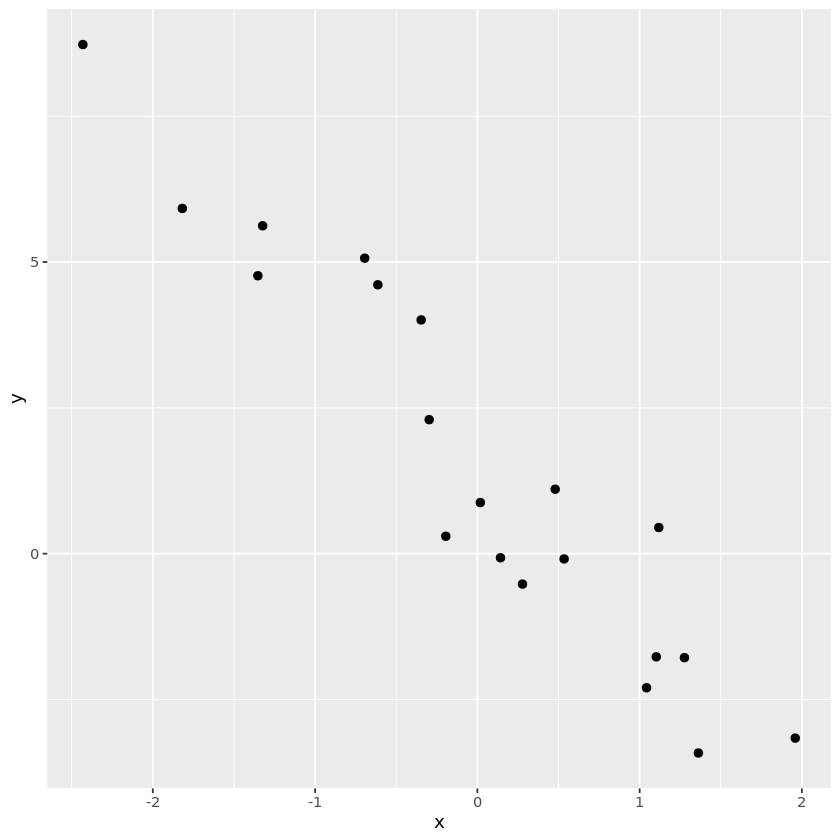

In [11]:
gg + 
geom_point(aes(x=x,y=y),size=2)

In [14]:
linear_model <- lm(df$y~df$x)

In [15]:
linear_model$coefficients

(Intercept)        df$x 
   1.565663   -2.810582

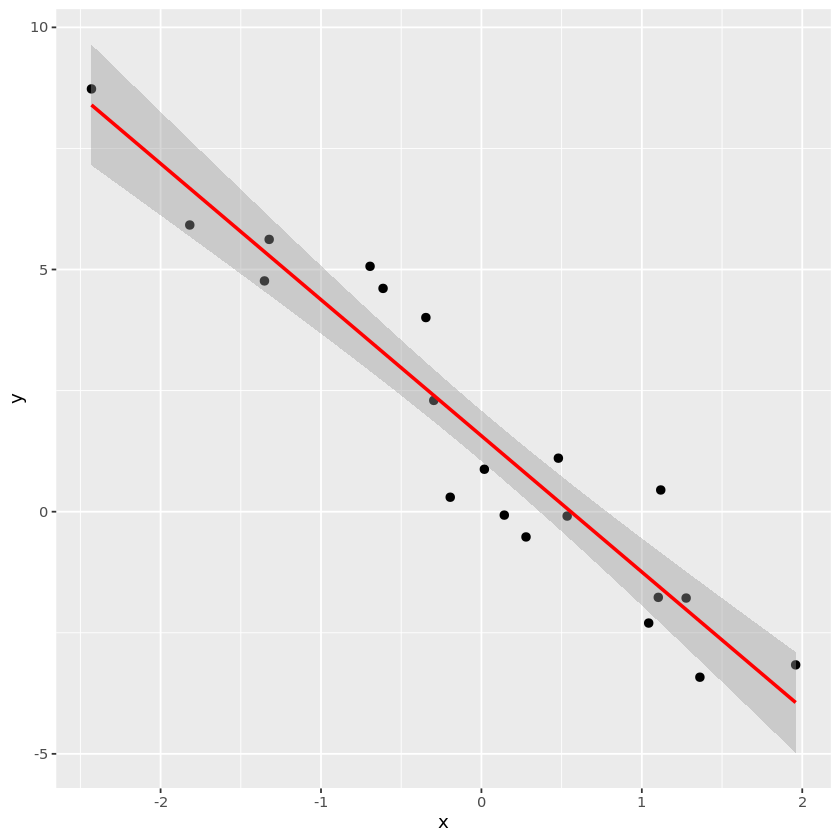

In [16]:
gg +
geom_point(aes(x=x,y=y),size=2) +
geom_smooth(method='lm',colour='red')

Método de descenso gradiente con $\beta_0=(0,0)^T$:

1) $$\min \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [17]:
cte <- sum(y*y)

In [18]:
A <- matrix(c(rep(1,mpoints),df$x),nrow=mpoints)

In [19]:
fo <-function(beta)1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))


In [20]:
beta_0 <- matrix(c(0,0),nrow=2)

In [21]:
beta_ast <- c(linear_model$coefficients[1],linear_model$coefficients[2])


In [22]:
beta_ast

(Intercept)        df$x 
   1.565663   -2.810582

In [23]:
p_ast <- fo(beta_ast)

In [24]:
p_ast

[1] 11.1175

In [25]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [26]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    7.73e+01   1.00e+00      1.24e+02      ---
2    4.17e+01   5.17e-01      3.46e+01      0.0625
3    2.41e+01   2.95e-01      1.14e+01      0.0625
4    1.41e+01   1.73e-01      3.91e+00      0.0625
5    8.27e+00   1.01e-01      1.35e+00      0.0625
6    4.86e+00   5.95e-02      4.65e-01      0.0625
7    2.85e+00   3.49e-02      1.60e-01      0.0625
8    1.68e+00   2.05e-02      5.53e-02      0.0625
9    9.84e-01   1.20e-02      1.91e-02      0.0625
10    5.78e-01   7.07e-03      6.58e-03      0.0625
11    3.39e-01   4.15e-03      2.27e-03      0.0625
12    1.99e-01   2.44e-03      7.83e-04      0.0625
13    1.17e-01   1.43e-03      2.70e-04      0.0625
14    6.88e-02   8.42e-04      9.31e-05      0.0625
15    4.04e-02   4.94e-04      3.21e-05      0.0625
16    2.37e-02   2.90e-04      1.11e-05      0.0625
17    1.39e-02   1.70e-04      3.82e-06      0.0625
18    8.19e-03   1.00e-04      1.32e-06      0.0625
19    4.81e-03   5.89

In [27]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [28]:
print(beta)

          [,1]
[1,]  1.565663
[2,] -2.810582


In [29]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


In [30]:
gg <- ggplot()

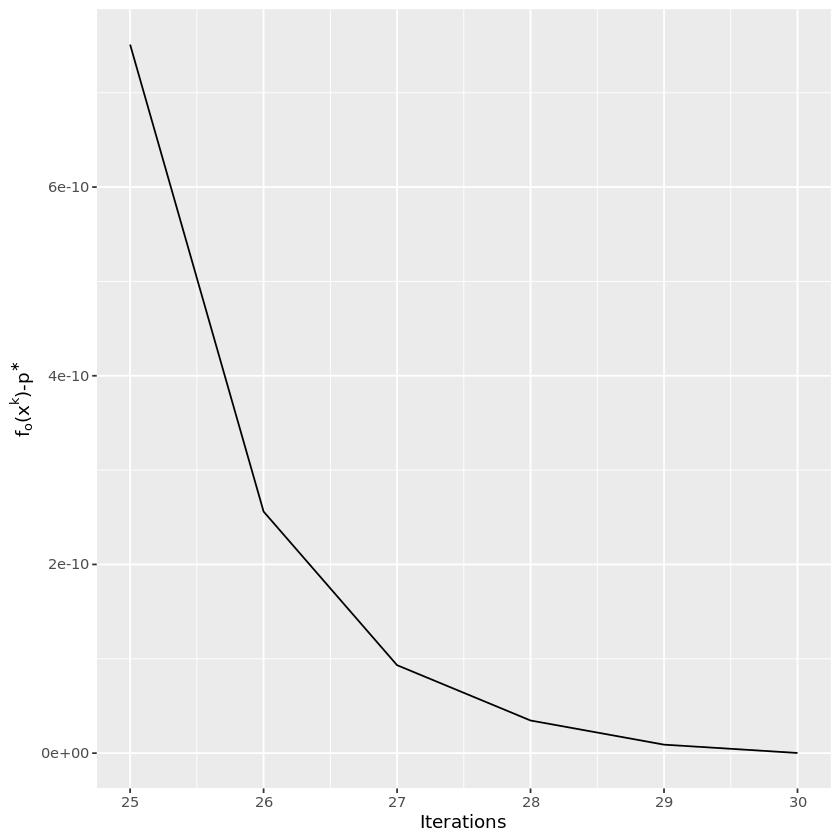

In [31]:
gg +
geom_line(aes(x=25:total_of_iterations,y=Err_plot[25:length(Err_plot)])) + 
xlab('Iterations') + ylab(TeX('f_o(x^k)-p^*'))


# Regularización

Penalización lasso

In [198]:
reg<-.5

In [199]:
quita_signo<-function(beta){
    if(min(abs(beta)) > (.Machine$double.xmin * .Machine$double.eps)){
    result<-sign(beta)*beta
    }else{
        result<- rep(.Machine$double.xmin * .Machine$double.eps,length(beta))
        }
    result
    }

In [200]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta))

In [201]:
beta_0<-c(-1,2)

In [202]:
gf <- function(beta) 1/mpoints * t(A)%*%(A%*%beta-y) + reg*sign(beta)

In [203]:
gf(beta_0)

-3.007055
6.574837


In [204]:
gradient_approximation(fo,beta_0)

[1] -3.007055  6.574836

In [205]:
beta_0 <- matrix(c(0,0),nrow=2)

In [206]:
gradient_approximation(fo,beta_0)

[1] -1.531421  3.548410

In [207]:
gf(beta_0)

-1.531421
3.548410


In [208]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,thresh=1e-8)

In [209]:
print(as.matrix(fit$beta))

          s0
V1  0.000000
V2 -2.416619


In [210]:
beta_ast <- as.matrix(fit$beta)


In [211]:
beta_ast

,s0
V1,0.000000
V2,-2.416619


In [212]:
p_ast <- fo(beta_ast)

In [213]:
p_ast

[1] 1.872512

In [214]:
beta_0<-c(0,0)

In [215]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [216]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    3.86e+00   1.00e+00      4.87e+00      ---
2    1.51e+00   7.88e-01      1.57e+00      1
3    3.82e-01   4.62e-01      7.03e-01      1
4    1.03e-01   4.39e-01      6.50e-01      1
5    2.78e-02   4.40e-01      6.46e-01      1
6    7.50e-03   4.39e-01      6.46e-01      1
7    2.03e-03   4.39e-01      6.46e-01      1
8    5.47e-04   4.39e-01      6.46e-01      1
9    1.47e-04   4.39e-01      6.46e-01      1
10    3.98e-05   4.39e-01      6.46e-01      1
11    1.08e-05   4.39e-01      6.46e-01      1
12    3.07e-06   4.39e-01      6.46e-01      1
13    7.56e-07   4.39e-01      6.46e-01      1
14    1.99e-07   4.39e-01      6.46e-01      1
15    8.88e-08   4.39e-01      6.46e-01      0.5
16    2.59e-07   4.39e-01      6.46e-01      0.25
17    1.78e-07   4.39e-01      6.46e-01      0.015625
18    1.33e-07   4.39e-01      6.46e-01      0.0078125
19    2.98e-07   4.39e-01      6.46e-01      0.0001220703125
20    1.33e-07   4.39e-01

In [217]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [218]:
print(beta)

[1]  1.060805 -2.411820


In [219]:
print(beta_ast)

          s0
V1  0.000000
V2 -2.416619


In [220]:
fo(beta)

[1] 2.518092

In [221]:
beta_plot

1.531421,1.074652,1.057145,1.061792,1.060538,1.060877,1.060785,1.060810,1.060803,1.060805,⋯,1.060805,1.060805,1.060805,1.060805,1.060805,1.060805,1.060805,1.060805,1.060805,1.060805
-3.548410,-2.111464,-2.492876,-2.389947,-2.417722,-2.410227,-2.412250,-2.411704,-2.411851,-2.411811,⋯,-2.411820,-2.411820,-2.411820,-2.411820,-2.411820,-2.411820,-2.411820,-2.411820,-2.411820,-2.411820


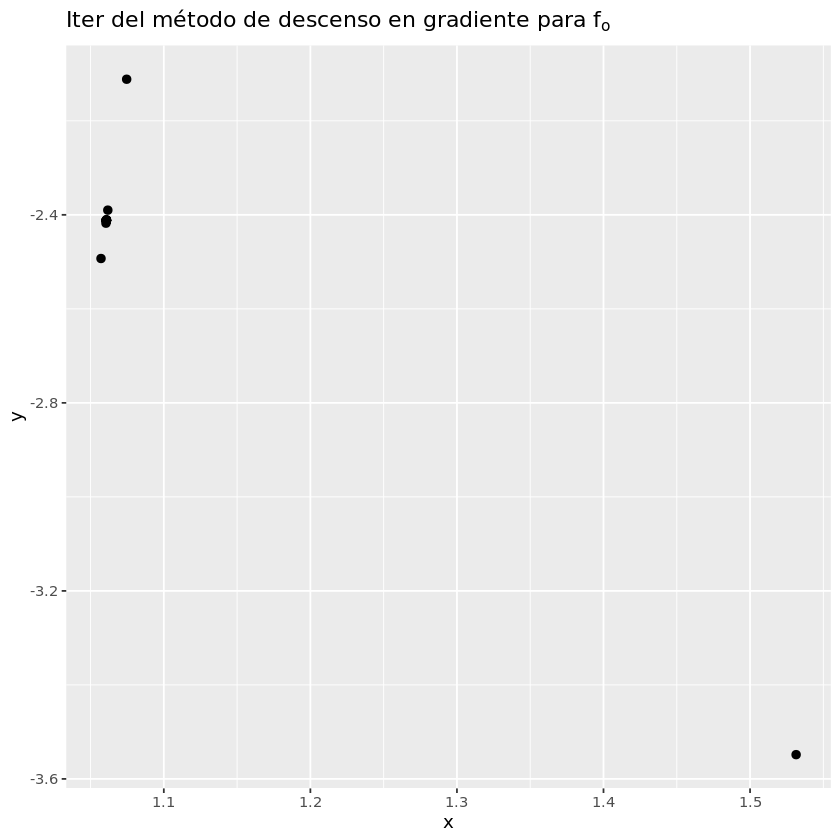

In [222]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**Referencias:**

* Ver [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb) para una introducción al problema de mínimos cuadrados con ejemplos en Python3.